### Read Raw Seabird CSV file for Quicklook

- csv output files should be erddap compliant

In [1]:
import EcoFOCI_Seabird_QuickLook as EcoSeabird
import glob
import ctd
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
fpath = '/Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/'

Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd001.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)0.0016777777777777492,0.004910392009354768
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd002.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)-0.007348484848484624,0.015889776514130198
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd003.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)0.0030999999999995254,0.0032941734847101636
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd004.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)-0.001694029850747146,0.03434361076213325
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd005.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)-0.0036166666666665273,0.03800052057673097
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd006.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)-0.00

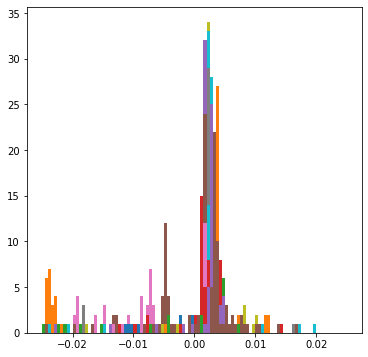

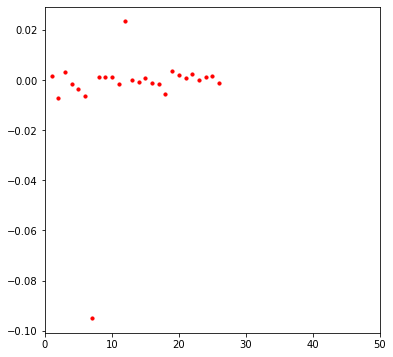

In [4]:
verbose= True
save_csv = True
plot = True

fig, ax = plt.subplots(figsize=(6, 6))
fig1, ax1 = plt.subplots(figsize=(6, 6))

for ctdfile in sorted(glob.glob(fpath + '*.cnv')):
    if 'a.cnv' in ctdfile:
        continue
    print(f"Working on {ctdfile}")

    ctd_df = ctd.from_cnv(ctdfile)

    ctd_df.describe()

    #add a column for erddap - profileid
    # following entries are from cnv files.  check for consistency with cast logs
    ctd_df['profile_id'] = fpath.split('/')[-3]+ctd_df._metadata['name']
    try:
        ctd_df['latitude'] = ctd_df._metadata['lat']
        ctd_df['longitude'] = ctd_df._metadata['lon']
        ctd_df['time'] = ctd_df._metadata['time']
    except:
        print("no gps")
        pass

    if verbose:
        saldiff = ctd_df.sal00-ctd_df.sal11
        print(f"Profile Averaged Salinity Difference,STD (chan1-chan2){saldiff.mean()},{saldiff.std()}")
    if save_csv:
        ctd_df.to_csv(ctdfile.split('/')[-1].replace('.cnv','.csv'))
    if plot:
        if abs(saldiff).mean() > .2:
            saldiff = saldiff*0
        ax.hist(saldiff,bins=100,range=(-.025,.025))
        #ax.set_xlim([-0.1,0.1])
        ax1.scatter(int(ctdfile.split('/')[-1].split('.')[0].split('ctd')[1]),
                 saldiff.mean(),s=10,c='red')
        ax1.set_xlim([0,50])


### Make some very simple range/climo qc choices

Temp: -2,20   
Sal:  20,36   
Par:  0,2000   
Chlor: 0,100   


In [5]:
qc_range_limits = {'temperature':[-2,20],
             'salinity': [30,36],
             'par': [0,2000],
             'chlorophyl': [0,100]}

In [11]:
for ctdfile in sorted(glob.glob(fpath + '*.cnv')):
    try:
        print(f"Working on {ctdfile}")
        ctd_df = ctd.from_cnv(ctdfile)
        ctd_df['t090C'][(ctd_df['t090C'] < qc_range_limits['temperature'][0])|(ctd_df['t090C'] > qc_range_limits['temperature'][1])] = np.nan
        ctd_df['t190C'][(ctd_df['t190C'] < qc_range_limits['temperature'][0])|(ctd_df['t190C'] > qc_range_limits['temperature'][1])] = np.nan
        ctd_df['sal11'][(ctd_df['sal11'] < qc_range_limits['salinity'][0])|(ctd_df['sal11'] > qc_range_limits['salinity'][1])] = np.nan
        ctd_df['sal00'][(ctd_df['sal00'] < qc_range_limits['salinity'][0])|(ctd_df['sal00'] > qc_range_limits['salinity'][1])] = np.nan
        ctd_df['par'][(ctd_df['par'] < qc_range_limits['par'][0])|(ctd_df['par'] > qc_range_limits['par'][1])] = np.nan
        ctd_df['flECO-AFL'][(ctd_df['flECO-AFL'] < qc_range_limits['chlorophyl'][0])|(ctd_df['flECO-AFL'] > qc_range_limits['chlorophyl'][1])] = np.nan
    except:
        pass
    
    if save_csv:
        ctd_df.to_csv(ctdfile.split('/')[-1].replace('.cnv','.csv'))

Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd001.cnv
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd001a.cnv
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd002.cnv
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd003.cnv


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/bell/anaconda2/envs/py3

Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd004.cnv
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd005.cnv
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd006.cnv
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd007.cnv
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd008.cnv
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd009.cnv
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd010.cnv
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd011.cnv
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd012.cnv
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd013.cnv
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd014.cnv
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd015.cnv
Working on /Users/bell/ecoraid/2018/CTDcasts/aq1801/rawconverted/ctd016.cnv
Working on /

### Create and Save Plots

Inputs are the respective columns in the data fram and identifiers for coloring.

In [12]:
ctd_df.columns

Index(['c0mS/cm', 'c1mS/cm', 'flECO-AFL', 'sbeox0V', 't090C', 't190C', 'timeS',
       'sbeox1V', 'par', 'turbWETntu0', 'sal00', 'sal11', 'sigma-t00',
       'sigma-t11', 'sbeox0ML/L', 'sbox0Mm/Kg', 'sbeox0PS', 'sbeox1ML/L',
       'sbox1Mm/Kg', 'sbeox1PS', 'flag'],
      dtype='object')

In [13]:
filetype = 'csv'

plots=True
for ctdfile in sorted(glob.glob('*ctd*.csv')):
    if not plots:
        break
    try:
        if 'cnv' in filetype:
            print(f"Working on {ctdfile}")
            ctd_df = ctd.from_cnv(ctdfile)
            ctd_data = EcoSeabird.CTDProfilePlot()
            file_ending = '.cnv'
        elif 'csv' in filetype:
            print(f"Working on {ctdfile}")
            ctd_df = pd.read_csv(ctdfile, index_col=['Pressure [dbar]'])
            ctd_data = EcoSeabird.CTDProfilePlot()
            file_ending = '.csv'

    except:
        continue
    
    #plots
    try:
        plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','S_41','S_42'],
                          xdata=[ctd_df.t090C,ctd_df.t190C,ctd_df.sal00,ctd_df.sal11],
                          ydata=ctd_df.index.values,
                          secondary=True,
                          xlabel=['Temperature','Salinity'])

        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        plt.savefig(ctdfile.split('/')[-1].replace(file_ending,'_TempSal.png'))
        plt.close(fig)

        plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','OST_62','CTDOST_4220'],
                          xdata=[ctd_df.t090C,ctd_df.t190C,ctd_df.sbeox0PS,ctd_df.sbeox1PS],
                          ydata=ctd_df.index.values,
                          secondary=True,
                          xlabel=['Temperature','Oxygen'])

        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        plt.savefig(ctdfile.split('/')[-1].replace(file_ending,'_TempOxy.png'))
        plt.close(fig)

        plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','ST_70','ST_2070'],
                          xdata=[ctd_df.t090C,ctd_df.t190C,ctd_df['sigma-t00'],ctd_df['sigma-t11']],
                          ydata=ctd_df.index.values,
                          secondary=True,
                          xlabel=['Temperature','SigmaT'])

        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        plt.savefig(ctdfile.split('/')[-1].replace(file_ending,'_TempSigmaT.png'))
        plt.close(fig)
    except:
        print("plotting failed")
        continue

    try:
        plt,fig =ctd_data.plot2var(epic_key=['PAR_905','PAR_905','Fch_906','Trb_980'],
                          xdata=[ctd_df.par,ctd_df.par,ctd_df['flECO-AFL'],ctd_df.turbWETntu0],
                          ydata=ctd_df.index.values,
                          secondary=True,
                          xlabel=['Par','Chlo/Turb'])

        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        plt.savefig(ctdfile.split('/')[-1].replace(file_ending,'_ParChlorTurb.png'))
        plt.close(fig)
    except:
        plt,fig =ctd_data.plot2var(epic_key=['PAR_905','PAR_905','fWS_973','Tr_904'],
                          xdata=[ctd_df.par,ctd_df.par,ctd_df['wetStar'],ctd_df.CStarTr0],
                          ydata=ctd_df.index.values,
                          secondary=True,
                          xlabel=['Par','Chlo/Turb'])

        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        plt.savefig(ctdfile.split('/')[-1].replace(file_ending,'_ParChlorTrans.png'))
        plt.close(fig)
        
    try:
        fig = EcoSeabird.plot_salvtemp(ctd_df.sal00,ctd_df.t090C,ctd_df.index,
                            srange=[ctd_df.sal00.min()-0.25,ctd_df.sal00.max()+.25],
                            trange=[ctd_df.t090C.min()-0.25,ctd_df.t090C.max()+.25],
                            ptitle=ctdfile.split('/')[-1])
        fig.savefig(ctdfile.split('/')[-1].replace(file_ending,'_TSSigma_depth.png'))
        plt.close(fig)
        
    except:
        print("plotting failed")
        continue

Working on ctd001.csv
Working on ctd001a.csv
Working on ctd002.csv
Working on ctd003.csv
Working on ctd004.csv
Working on ctd005.csv
Working on ctd006.csv
Working on ctd007.csv
Working on ctd008.csv
Working on ctd009.csv
Working on ctd010.csv
Working on ctd011.csv
Working on ctd012.csv
Working on ctd013.csv
Working on ctd014.csv
Working on ctd015.csv
Working on ctd016.csv
Working on ctd017.csv
Working on ctd018.csv
Working on ctd019.csv
Working on ctd020.csv
Working on ctd021.csv
Working on ctd022.csv
Working on ctd023.csv
Working on ctd024.csv
Working on ctd025.csv
Working on ctd026.csv
Working on dctd001.csv
Working on dctd001a.csv
Working on dctd002.csv
Working on dctd003.csv
Working on dctd004.csv
Working on dctd005.csv
Working on dctd006.csv
Working on dctd007.csv
Working on dctd008.csv
Working on dctd009.csv
Working on dctd010.csv
Working on dctd011.csv
Working on dctd012.csv
Working on dctd013.csv
Working on dctd014.csv
Working on dctd015.csv
Working on dctd016.csv
Working on dc

Working on ctd001*.csv
Working on ctd002*.csv
Working on ctd003*.csv
Working on ctd004*.csv
Working on ctd005*.csv
Working on ctd006*.csv
Working on ctd007*.csv
Working on ctd008*.csv
Working on ctd009*.csv
Working on ctd010*.csv
Working on ctd011*.csv
Working on ctd012*.csv
Working on ctd013*.csv
Working on ctd014*.csv
Working on ctd015*.csv
Working on ctd016*.csv
Working on ctd017*.csv
Working on ctd018*.csv
Working on ctd019*.csv
Working on ctd020*.csv
Working on ctd021*.csv


/Users/bell/Programs/Python/EcoFOCI_Jupyter_Notebooks/EcoFOCI_Cruises/EcoFOCI_Seabird_QuickLook.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(5.5, 4.25))


Working on ctd022*.csv


/Users/bell/Programs/Python/EcoFOCI_Jupyter_Notebooks/EcoFOCI_Cruises/EcoFOCI_Seabird_QuickLook.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(5.5, 4.25))


Working on ctd023*.csv


/Users/bell/Programs/Python/EcoFOCI_Jupyter_Notebooks/EcoFOCI_Cruises/EcoFOCI_Seabird_QuickLook.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(5.5, 4.25))


Working on ctd024*.csv


/Users/bell/Programs/Python/EcoFOCI_Jupyter_Notebooks/EcoFOCI_Cruises/EcoFOCI_Seabird_QuickLook.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(5.5, 4.25))


Working on ctd025*.csv


/Users/bell/Programs/Python/EcoFOCI_Jupyter_Notebooks/EcoFOCI_Cruises/EcoFOCI_Seabird_QuickLook.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(5.5, 4.25))


Working on ctd026*.csv


/Users/bell/Programs/Python/EcoFOCI_Jupyter_Notebooks/EcoFOCI_Cruises/EcoFOCI_Seabird_QuickLook.py:133: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(5.5, 4.25))


Working on ctd027*.csv
Working on ctd028*.csv
Working on ctd029*.csv
Working on ctd030*.csv
Working on ctd031*.csv
Working on ctd032*.csv
Working on ctd033*.csv
Working on ctd034*.csv
Working on ctd035*.csv
Working on ctd036*.csv
Working on ctd037*.csv
Working on ctd038*.csv
Working on ctd039*.csv
Working on ctd040*.csv
Working on ctd041*.csv
Working on ctd042*.csv
Working on ctd043*.csv
Working on ctd044*.csv
Working on ctd045*.csv
Working on ctd046*.csv
Working on ctd047*.csv
Working on ctd048*.csv
Working on ctd049*.csv
Working on ctd050*.csv
Working on ctd051*.csv
Working on ctd052*.csv
Working on ctd053*.csv
Working on ctd054*.csv
Working on ctd055*.csv
Working on ctd056*.csv
Working on ctd057*.csv
Working on ctd058*.csv
Working on ctd059*.csv
Working on ctd060*.csv
Working on ctd061*.csv
Working on ctd062*.csv
Working on ctd063*.csv
Working on ctd064*.csv
Working on ctd065*.csv
Working on ctd066*.csv
Working on ctd067*.csv
Working on ctd068*.csv
Working on ctd069*.csv
Working on 

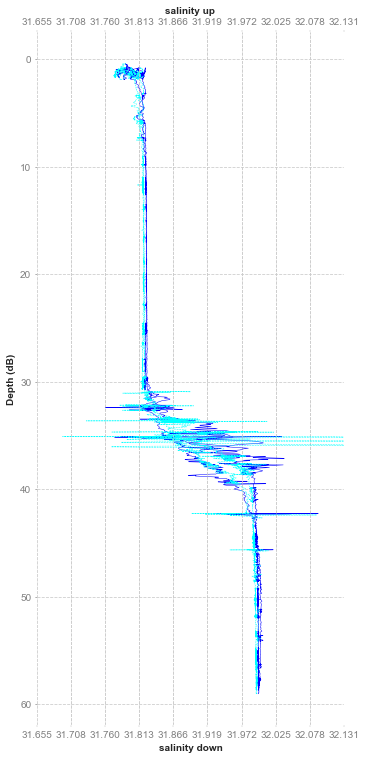

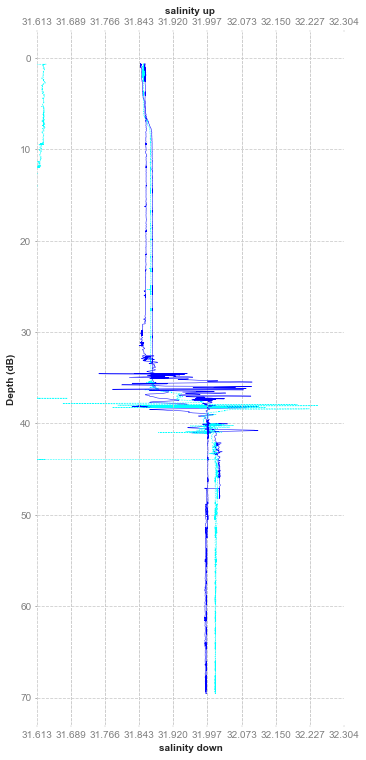

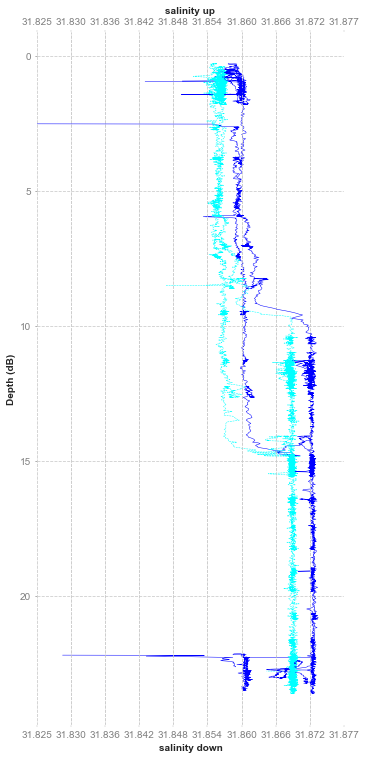

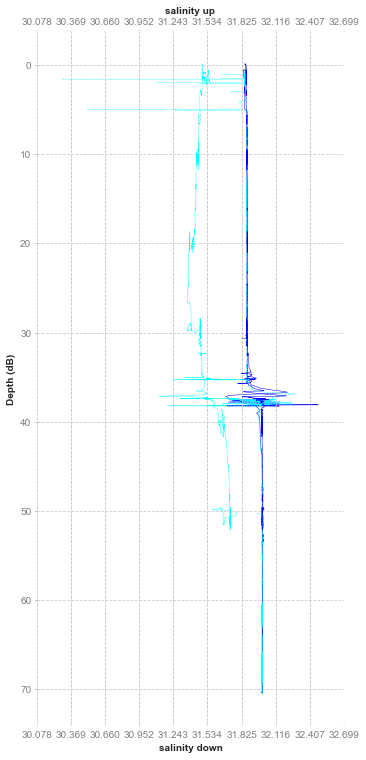

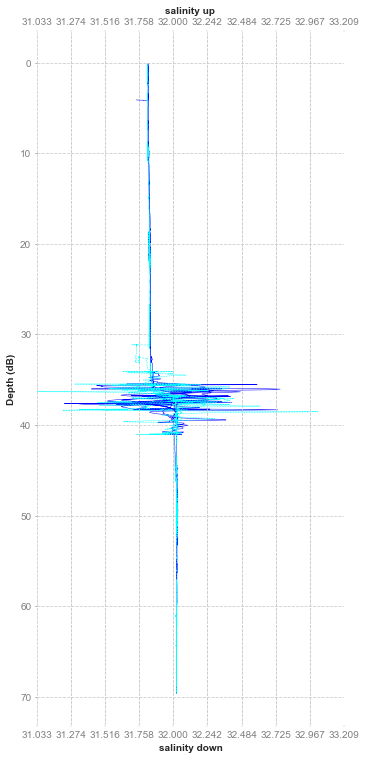

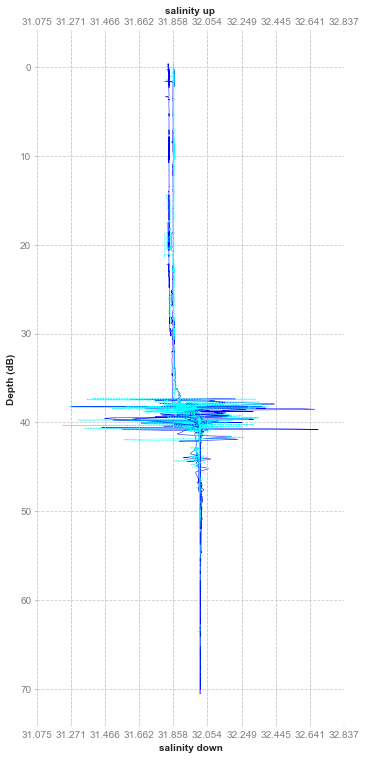

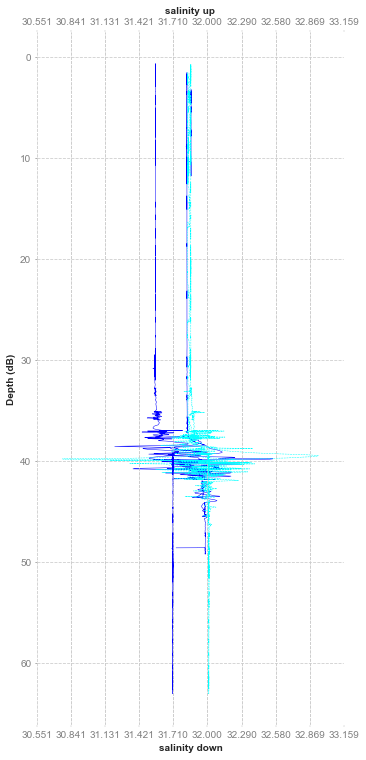

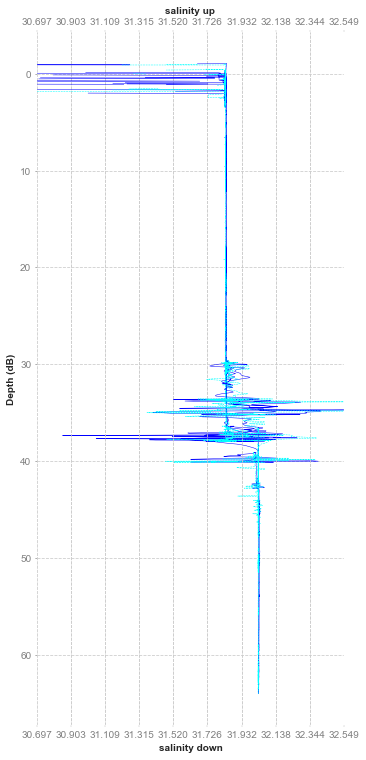

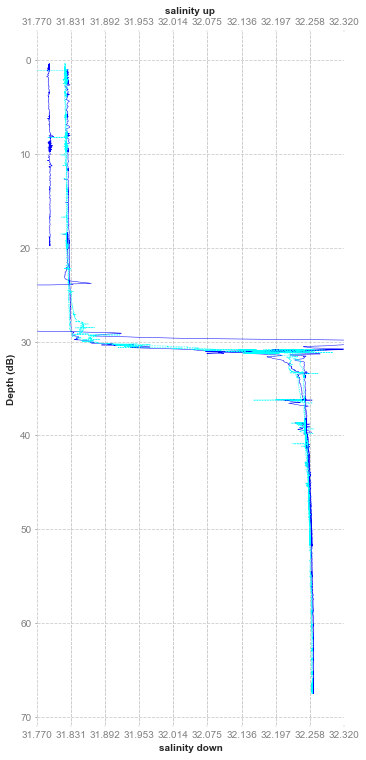

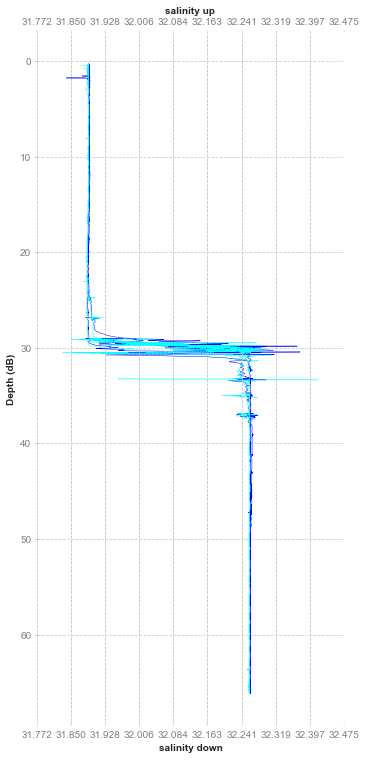

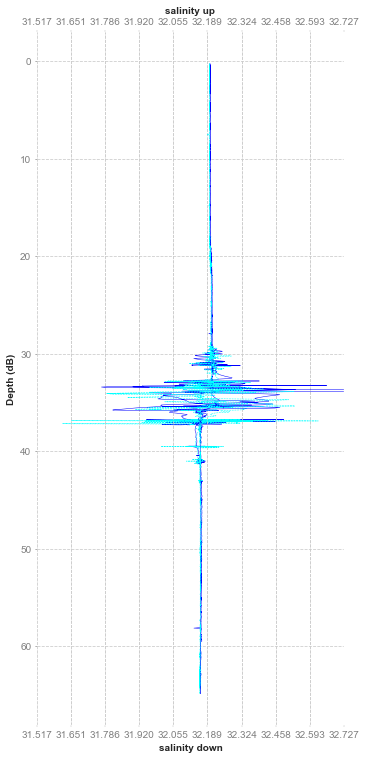

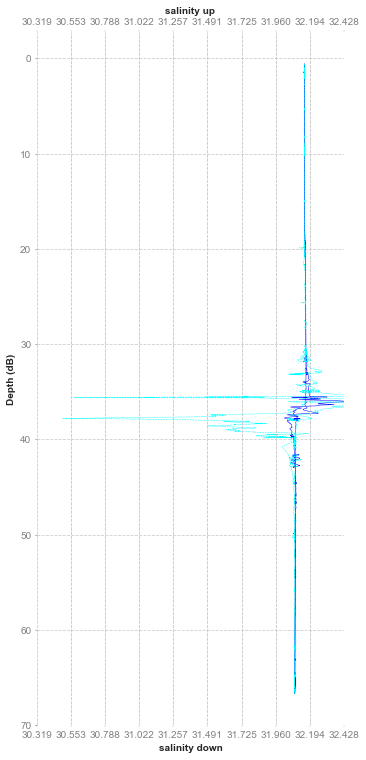

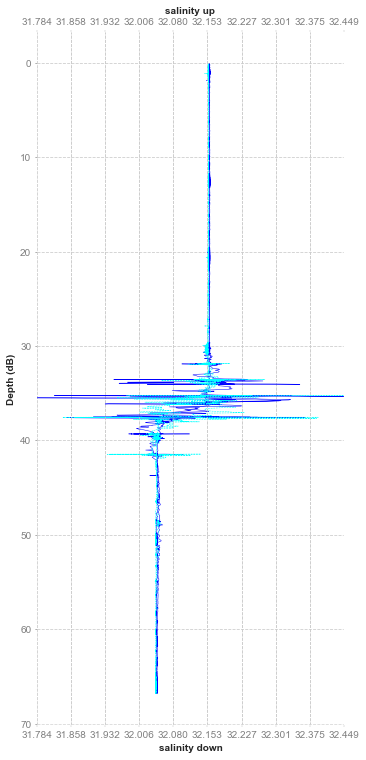

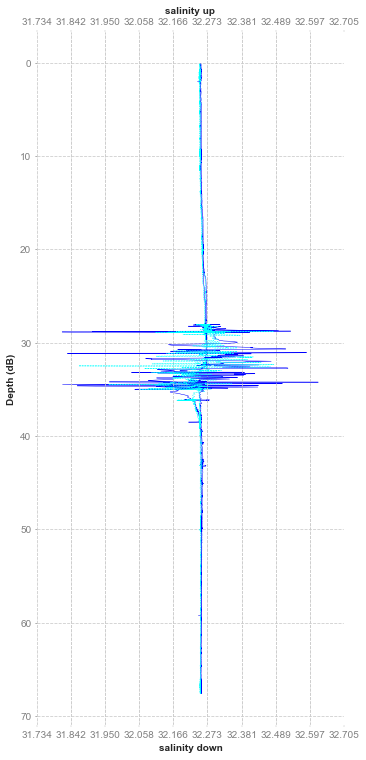

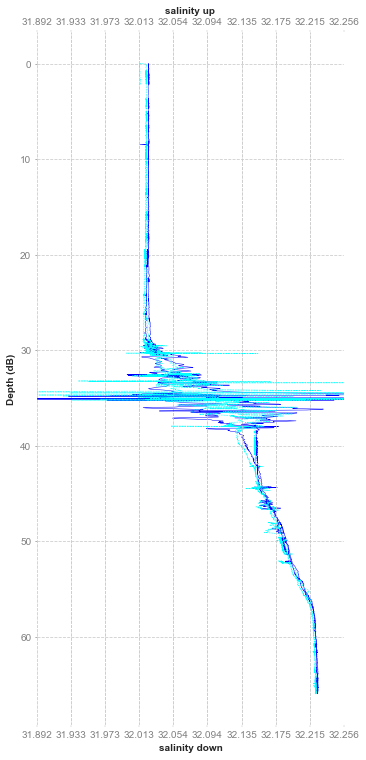

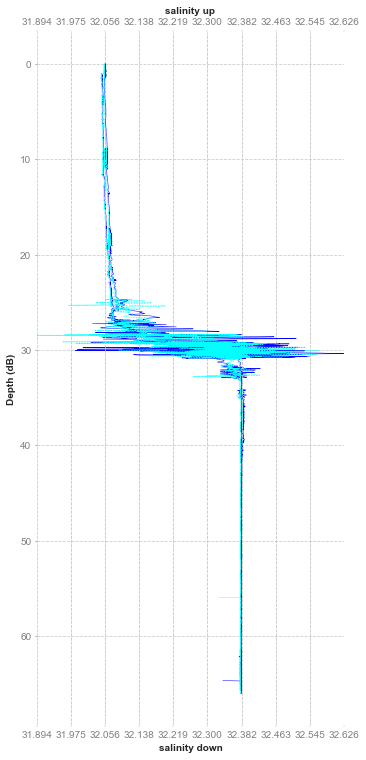

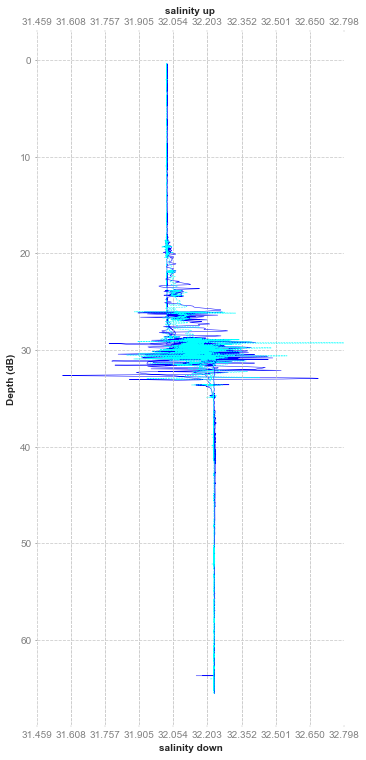

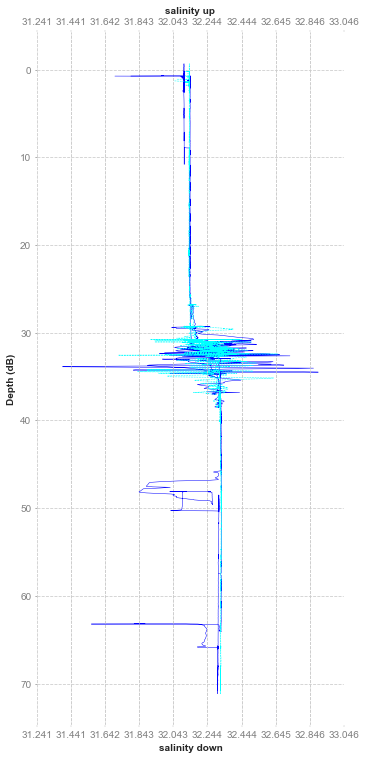

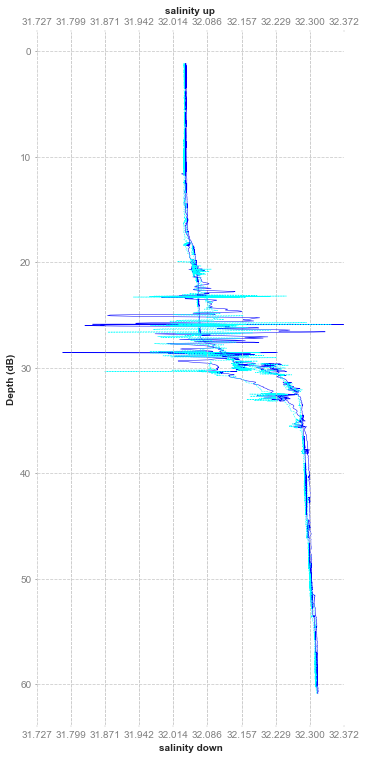

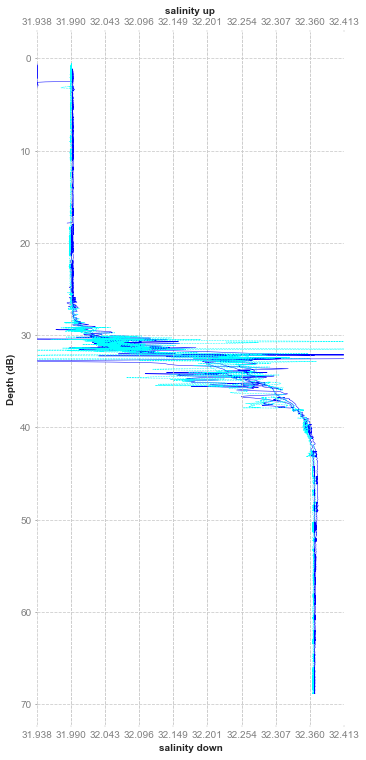

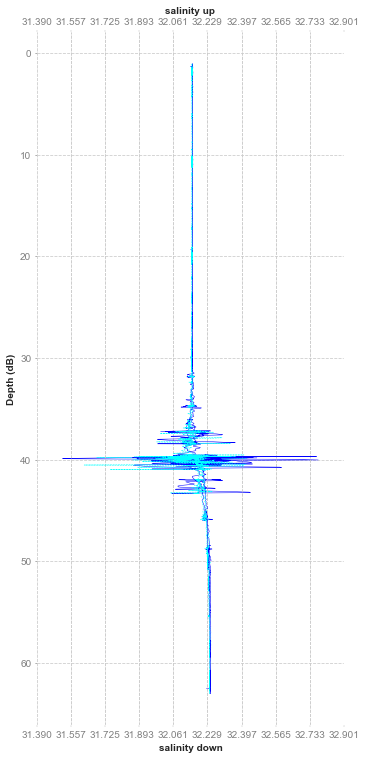

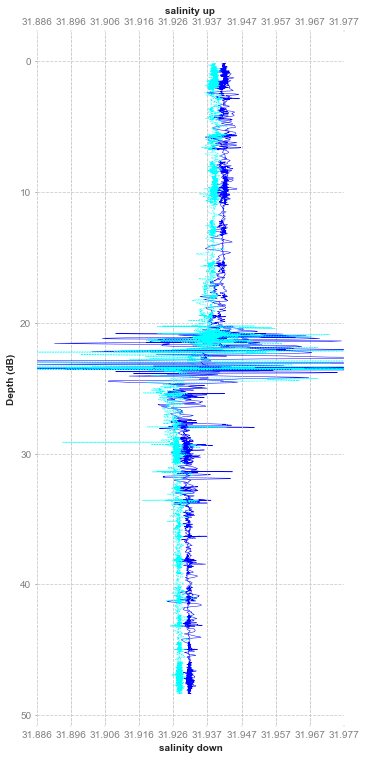

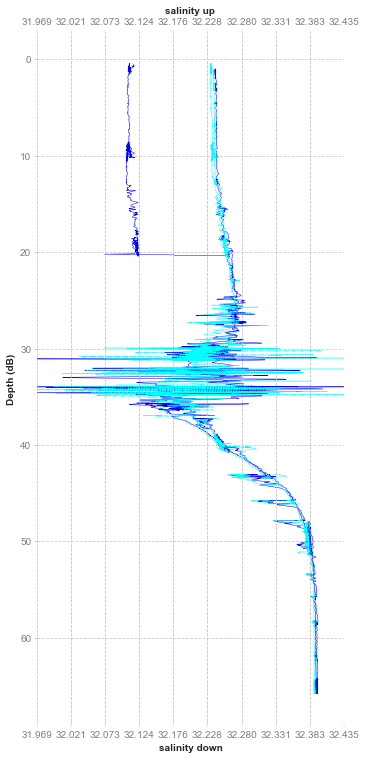

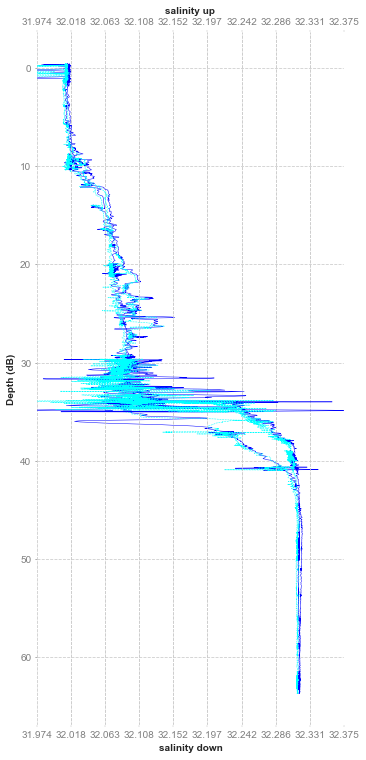

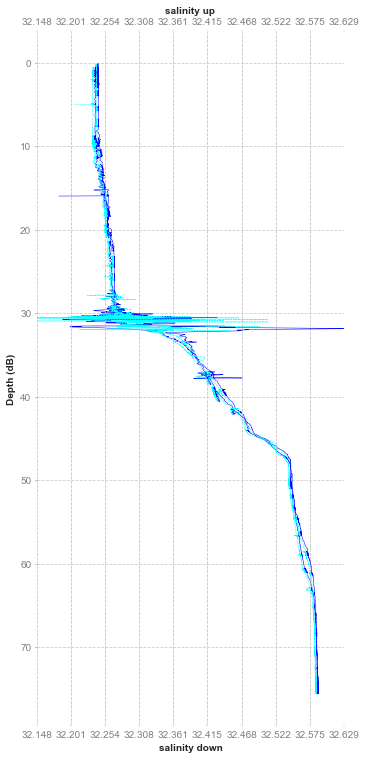

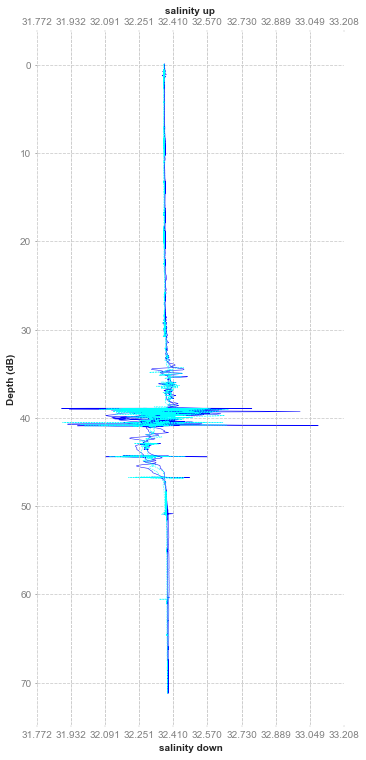

In [14]:
# two casts

plots=True
for count in range(1,100,1):
    try:
        ctdcount = str(count).zfill(3)
        ctdfile = 'ctd'+ctdcount+'*.csv'

        print(f"Working on {ctdfile}")
        ctd_df_d = pd.read_csv(glob.glob('*d'+ctdfile)[0], index_col=['Pressure [dbar]'])
        ctd_df_u = pd.read_csv(glob.glob('*u'+ctdfile)[0], index_col=['Pressure [dbar]'])
        #ctd_df = pd.read_csv(glob.glob(ctdfile)[0], index_col=['Pressure [dbar]'])
        ctd_data = EcoSeabird.CTDProfilePlot()
        file_ending = '.csv'

        plt,fig =ctd_data.plot2var_2y(epic_key=['S_41','S_42','S_41','S_42'],
                          xdata=[ctd_df_d.sal00,ctd_df_d.sal11,ctd_df_u.sal00,ctd_df_u.sal11],
                          ydata=[ctd_df_d.index.values,ctd_df_u.index.values],
                          secondary=True,
                          xlabel=['salinity down','salinity up'])    
        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        fig.savefig(ctdfile.split('/')[-1].replace(file_ending,'_updown_salcompare.png'))
    except:
        continue
    